# Task 3 - Wine quality prediction 

## 1. Importing Libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## 2. Load & Explore Dataset 

In [13]:
# Load the dataset
df = pd.read_csv('dataset/winequality-red.csv')

In [14]:
# Display the first few rows of the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [15]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [16]:
# Get basic statistics of the dataset
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## 3. EDA

### (i) Histograms of Wine Quality

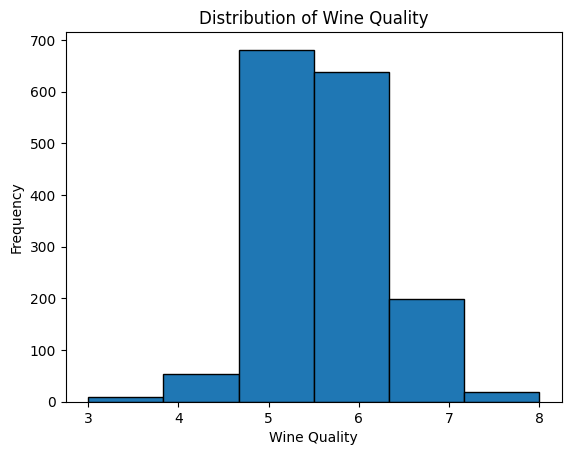

In [17]:
# Plot a histogram of wine quality to see its distribution
plt.hist(df['quality'], bins=6, edgecolor='k')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

### (iii) Correlation Matrix Heatmap

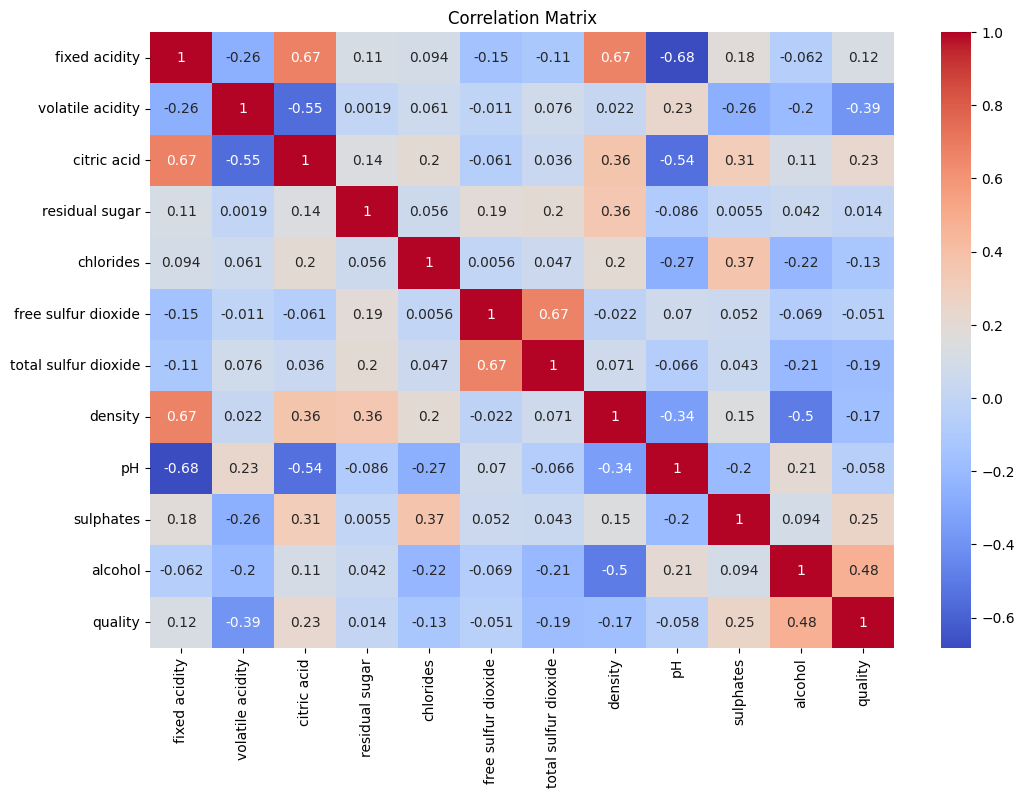

In [18]:
# Create a correlation matrix to visualize feature relationships
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### (iii)  Box Plots for Wine Quality vs. Features 

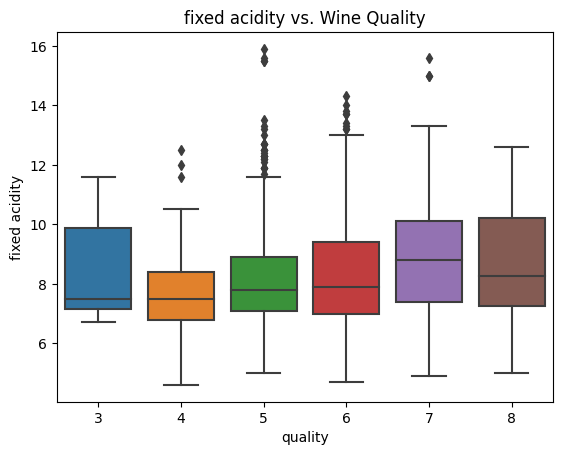

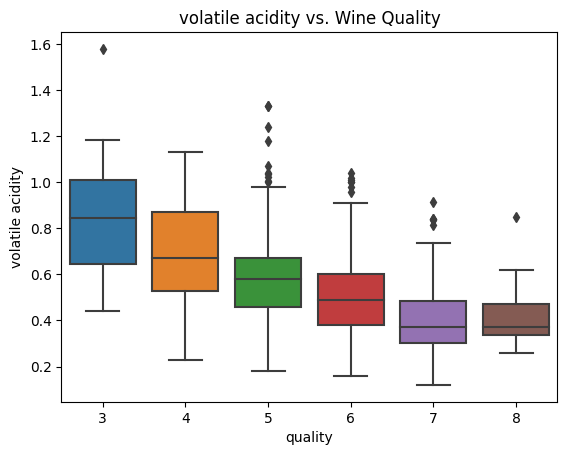

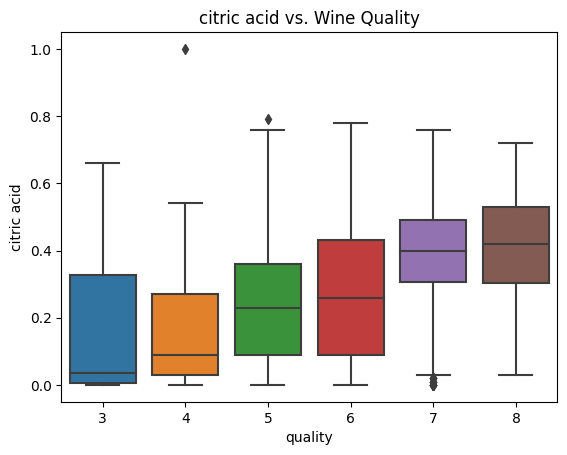

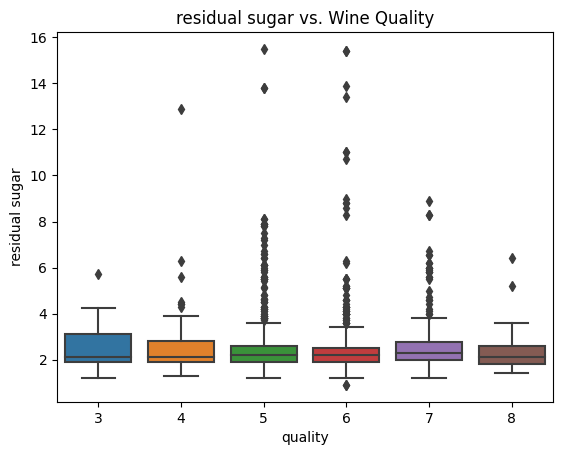

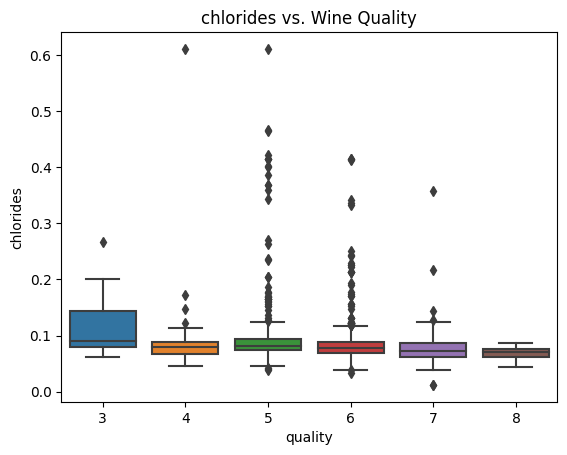

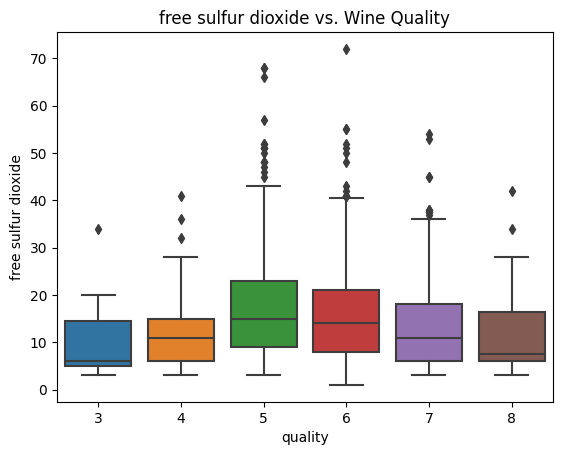

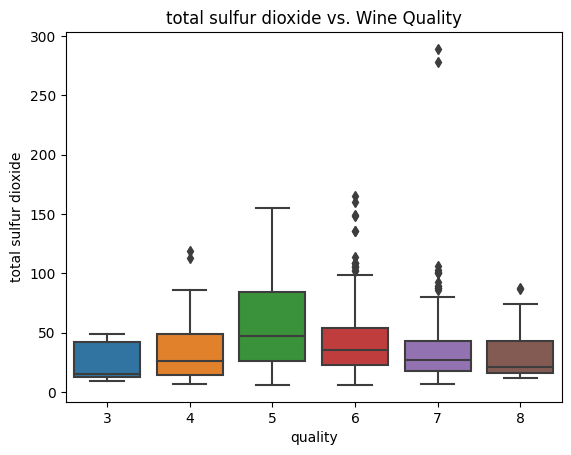

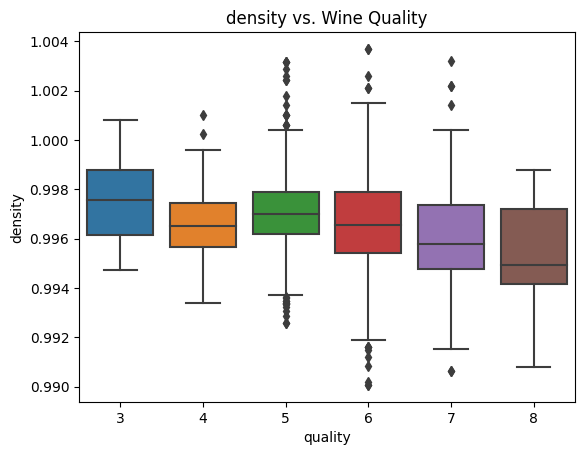

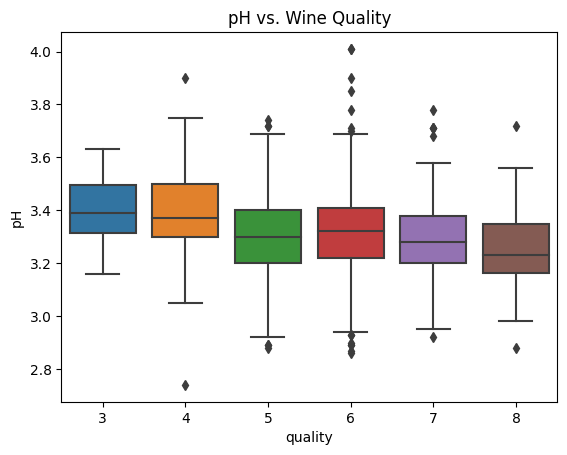

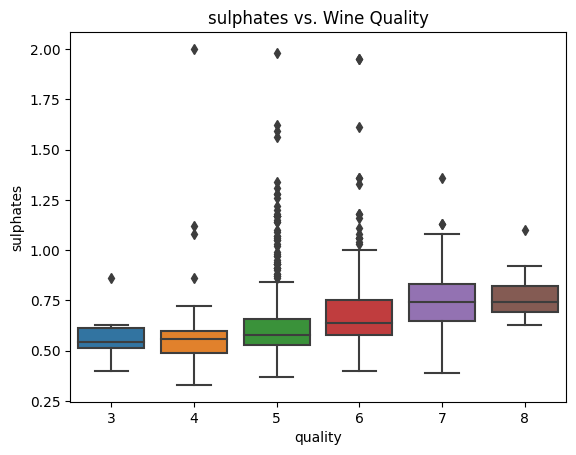

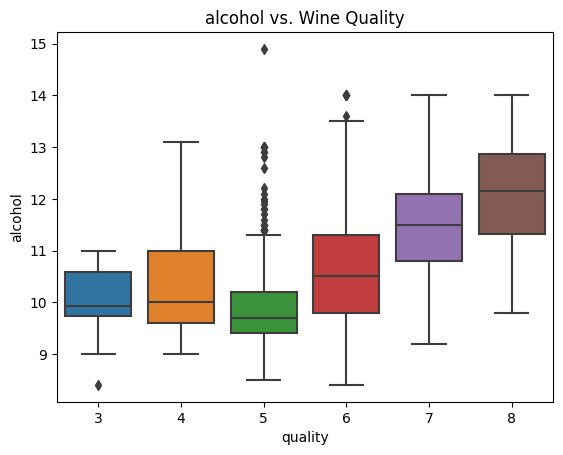

In [19]:
# Create box plots for wine quality vs. each feature
features = df.columns[:-1]
for feature in features:
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs. Wine Quality')
    plt.show()


### (iv) Pair Plots 

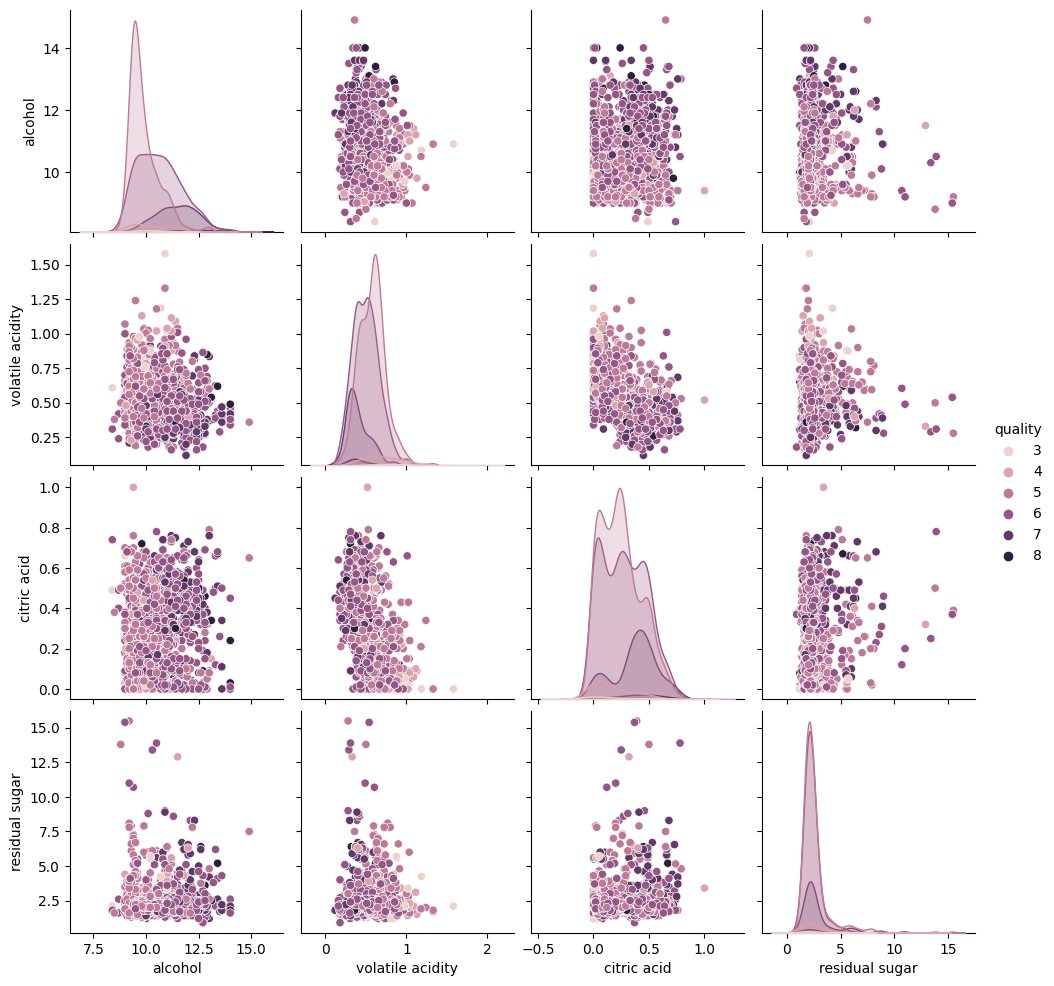

In [20]:
# Create pair plots for selected features
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'citric acid', 'residual sugar'], hue='quality')
plt.show()

## 4. Data Preprocessing 

In [24]:
# Split the data into features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Choose a Machine Learning Algorithm 

In [25]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

## 6. Train the Model 

In [26]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 7. Hyperparameter Tuning 

In [27]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator from the grid search
clf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


## 8. Model Evaluation

In [30]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("\n\nConfusion Matrix:\n", conf_matrix)
print("\n\nClassification Report:\n", classification_rep)

Accuracy: 0.66875


Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 27 94 11  0]
 [ 0  0  0 20 22  0]
 [ 0  0  0  1  4  0]]


Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.75      0.75       130
           6       0.62      0.71      0.66       132
           7       0.59      0.52      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320



## 9. Model Assessment 

### (i) Confusion Matrix Heatmap 

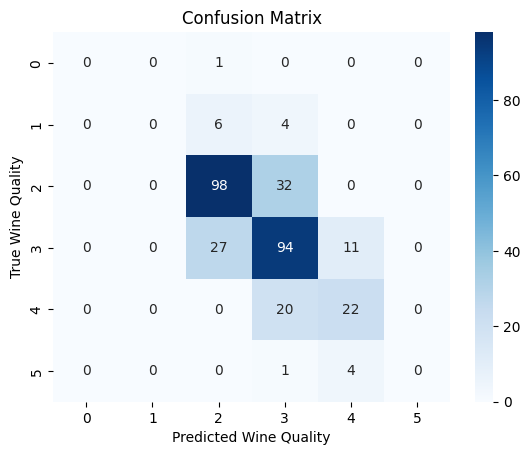

In [31]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Wine Quality')
plt.ylabel('True Wine Quality')
plt.title('Confusion Matrix')
plt.show()

### (ii)  Probability Distribution

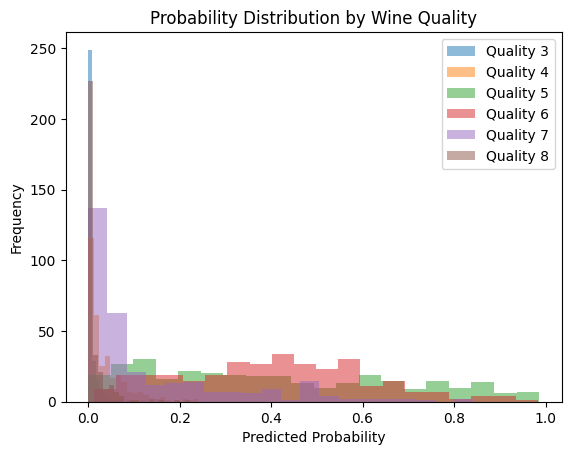

In [35]:
# Predicted probabilities for wine quality categories
probabilities = clf.predict_proba(X_test)

# Create histograms for predicted probabilities
for i in range(probabilities.shape[1]):
    plt.hist(probabilities[:, i], bins=20, alpha=0.5, label=f'Quality {i + 3}')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Probability Distribution by Wine Quality')
plt.show()